# Estimating the mRNA polymerase elongation rate in *Drosophila* embryos

This exercise was generated from a Jupyter notebook. You can download the notebook [here](fly_elongation_rate_in_class.ipynb).

In [78]:
# Import necessary modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Pretty plots
import seaborn as sns
sns.set()

# For reading images
import skimage.io

# For extracting file names
import glob

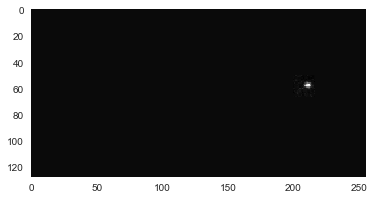

In [79]:
# Import a sample image
im = skimage.io.imread('data/ms2_elongation/Nucleus001/green_nucleus001_frame042.tif')

# Show the image
plt.imshow(im, cmap = plt.cm.Greys_r)

# Turn the grid off
plt.grid('off')

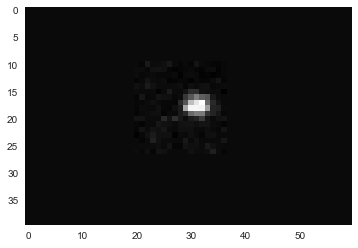

In [80]:
# Zoom
im_zoom = im[40:80, 180:240]

# Show the zoomed image
plt.imshow(im_zoom, cmap = plt.cm.Greys_r)
plt.grid('off')

In [81]:
# Sample matrix
mat = np.array([1, 2, 3, 4, 5, 6, 7])
print(mat[::-1])

# mat[begin:end:step]

[7 6 5 4 3 2 1]


[288 274 272 269 252 216 200 195 173 172]


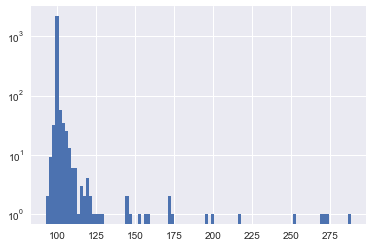

In [82]:
# Flatten the image to 1d
im_1d = im_zoom.flatten()

# Sort the pixel values
pixel_sorted = np.sort(im_1d)

# Histogram
_ = plt.hist(im_1d, bins = 100)
plt.yscale('log')

# Pixel intensities in a descending order
pixel_descend = pixel_sorted[::-1]

print(pixel_descend[0:10])

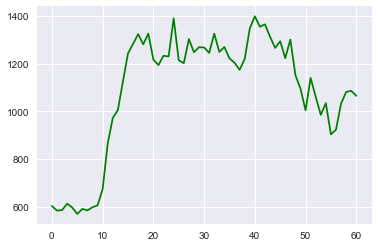

In [83]:
# Frame names of plots in nucleus 1, the green channel
frame_names_g = glob.glob('data/ms2_elongation/Nucleus001/green_nucleus001_*')

# Number of frames
n_frames = len(frame_names_g)

# Array to store intensity values
intensity_g = np.zeros(n_frames)

for i in range(n_frames):
    
    # Read the frame
    im = skimage.io.imread(frame_names_g[i])
    
    # Flatten the image and sort
    im_sorted = np.sort(im.flatten())
    
    # Reverse the order
    im_reversed = im_sorted[::-1]
    
    # Calculate the intensity of the spot
    intensity_g[i] = np.sum(im_reversed[0:5])
    
plt.plot(intensity_g, color = 'g')

In [84]:
m = np.array([1,3,4,5,6,8])
m[-1:-6:-1]

array([8, 6, 5, 4, 3])

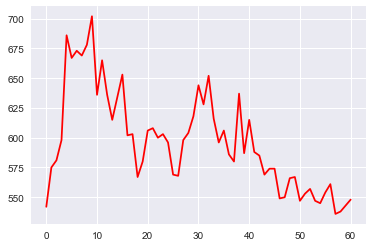

In [85]:
# Names of all frames in Nucleus 1 in red channel
frame_names_r = glob.glob('data/ms2_elongation/Nucleus001/red_nucleus001_*')

# Number of frames
n_frames_r = len(frame_names_r)

# Array to store intensity values
intensity_r = np.zeros(n_frames_r)

for i in range(n_frames_r):
    
    im = skimage.io.imread(frame_names_r[i])
    im_sorted = np.sort(im.flatten())
    intensity_r[i] = np.sum(im_sorted[-1:-6:-1])
    
plt.plot(intensity_r, color = 'r')

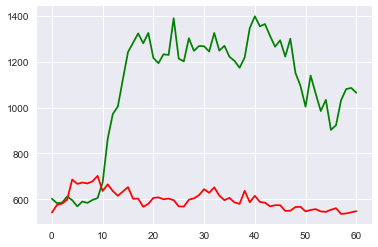

In [86]:
plt.plot(intensity_g, color='g')
plt.plot(intensity_r, color='r')

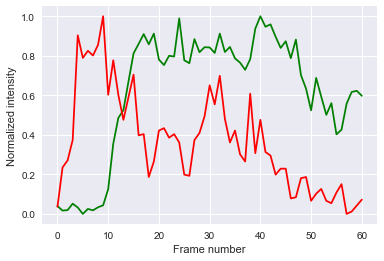

In [87]:
intensity_g_norm = (intensity_g - np.min(intensity_g))/(np.max(intensity_g) - np.min(intensity_g))
intensity_r_norm = (intensity_r - np.min(intensity_r))/(np.max(intensity_r) - np.min(intensity_r))
plt.plot(intensity_g_norm, color = 'g')
plt.plot(intensity_r_norm, color = 'r')
plt.xlabel('Frame number')
plt.ylabel('Normalized intensity')

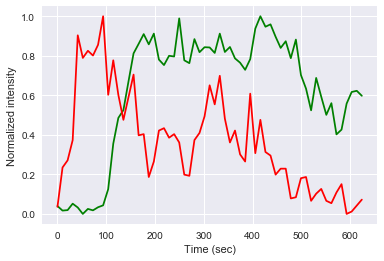

In [88]:
# Time resolution in seconds
dt = 10.4

# Measurement times
times = dt * np.arange(n_frames)

plt.plot(times, intensity_g_norm, color = 'g')
plt.plot(times, intensity_r_norm, color = 'r')
plt.xlabel('Time (sec)')
plt.ylabel('Normalized intensity')

In [35]:
# Length of the gene in basepairs
bp = 4500

# Threshold intensities
thresh_green = 700
thresh_red = 575

intensity_g

array([  602.,   583.,   585.,   612.,   596.,   569.,   590.,   584.,
         597.,   605.,   673.,   864.,   972.,  1005.,  1125.,  1243.,
        1283.,  1324.,  1281.,  1326.,  1217.,  1194.,  1233.,  1230.,
        1390.,  1214.,  1202.,  1303.,  1248.,  1269.,  1268.,  1245.,
        1326.,  1249.,  1270.,  1222.,  1204.,  1174.,  1219.,  1347.,
        1399.,  1355.,  1365.,  1313.,  1266.,  1294.,  1223.,  1301.,
        1152.,  1095.,  1004.,  1140.,  1061.,   985.,  1034.,   903.,
         923.,  1032.,  1081.,  1086.,  1065.])

In [44]:
# Positions where threshold condition is met
positions = np.where(intensity_g > thresh_green)

# Pick the first one
start_position = positions[0][0]

print('Green spot appears at frame ' + str(start_position))

# Time when the spot first appears
start_time = times[start_position]
print('Green spot appears first at time ' + str(start_time) + ' sec')

Green spot appears at frame 11
Green spot appears first at time 114.4 sec


In [51]:
# Names of directories that contain nuclei
nuclei_names = glob.glob('data/ms2_elongation/*')

nuclei_names[0:5]

['data/ms2_elongation/Nucleus001',
 'data/ms2_elongation/Nucleus002',
 'data/ms2_elongation/Nucleus003',
 'data/ms2_elongation/Nucleus004',
 'data/ms2_elongation/Nucleus005']

In [52]:
# Number of nuclei
n_nuclei = len(nuclei_names)

print('Number of nuclei ' + str(n_nuclei))

Number of nuclei 29


In [53]:
nuclei_names[0] + '/green*'

'data/ms2_elongation/Nucleus001/green*'

In [54]:
m = np.array([1,3,4,5,6])
m[-2:]

array([5, 6])

In [55]:
# Arrays to store the times where the spot appears in green and blue channels
spot_times_g = np.zeros(n_nuclei)
spot_times_r = np.zeros(n_nuclei)

# Iterate over all nuclei
for i in range(n_nuclei):
    
    # -------------------- GREEN CHANNEL --------------------
    
    # All frames in green channel for ith nucleus
    frame_names_g = glob.glob(nuclei_names[i] + '/green*')
    
    # Number of frames in the green channel
    n_frames_g = len(frame_names_g)
    
    # Array to store the intensity values
    intensity_g = np.zeros(n_frames_g)
    
    # Iterate over all frames in the green channel
    for j in range(n_frames_g):
        
        # Read the image
        im = skimage.io.imread(frame_names_g[j])
        
        # Sort the pixel value
        im_sort = np.sort(im.flatten())
        
        # Calculate the intensity value
        intensity_g[j] = np.sum(im_sort[-5:])
    
    # Positions where intensity is greater than the threshold
    positions_g = np.where(intensity_g > thresh_green)
    
    # First position where the intenisty is greater than the threshold
    index_spot_g = positions_g[0][0]
    
    # Time when the intensity first exceeds the threshold
    spot_times_g[i] = times[index_spot_g]
    
    
    # -------------------- RED CHANNEL --------------------
    
    # All frames in red channel for ith nucleus
    frame_names_r = glob.glob(nuclei_names[i] + '/red*')
    
    # Number of frames in the red channel
    n_frames_r = len(frame_names_r)
    
    # Array to store the intensity values
    intensity_r = np.zeros(n_frames_r)
    
    # Iterate over all frames in the red channel
    for j in range(n_frames_r):
        
        # Read the image
        im = skimage.io.imread(frame_names_r[j])
        
        # Sort the pixel value
        im_sort = np.sort(im.flatten())
        
        # Calculate the intensity value
        intensity_r[j] = np.sum(im_sort[-5:])
    
    # Positions where intensity is greater than the threshold
    positions_r = np.where(intensity_r > thresh_red)
    
    # First position where the intenisty is greater than the threshold
    index_spot_r = positions_r[0][0]
    
    # Time when the intensity first exceeds the threshold
    spot_times_r[i] = times[index_spot_r]

In [56]:
# Elongation times estimated for different nuclei
elongation_times = spot_times_g - spot_times_r

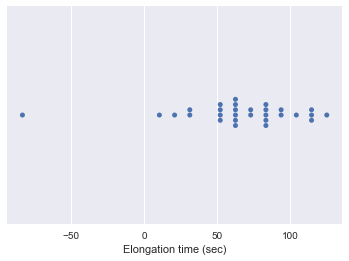

In [58]:
# Make a swarmplot of elongation times
_ = sns.swarmplot(elongation_times)
plt.xlabel('Elongation time (sec)')

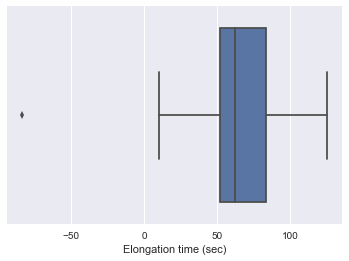

In [66]:
# Make a boxplot of elongation times
_ = sns.boxplot(elongation_times)
plt.xlabel('Elongation time (sec)')

In [71]:
# Estimate of the elongation time in seconds
t_elong = np.median(elongation_times)
print('Elongation time estimate: ' + str(t_elong) + ' sec')

Elongation time estimate: 62.4 sec


In [68]:
dt

10.4

In [69]:
thresh_green

700

In [70]:
thresh_red

575

In [72]:
# Number of basepairs
bp

4500

In [77]:
# Elongation rate estimate in bp / sec
rate_elong = round(bp / t_elong)
print('Elongation rate ' + str(rate_elong) + ' bp/sec')

# Elongation rate estimate in kbp / min
rate_elong_2 = rate_elong * 60 / 1000
print('Elongation rate ' + str(rate_elong_2) + ' kbp/min')

Elongation rate 72.0 bp/sec
Elongation rate 4.32 kbp/min
